<a href="https://colab.research.google.com/github/luanfelixcoding/storytelling-covid/blob/Mafra/data_cleaning/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [493]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


df_br = pd.read_csv('/content/Indic_BR/Indic_BR2023.csv', sep=';', encoding='utf-8')
df_geo = pd.read_csv('/content/Indic_Geo/Indic_Geo2023.csv', sep=';', encoding='utf-8')
df_esc = pd.read_csv('/content/Rend_Escolar/Rend_Escolar2023.csv', sep=';', encoding='utf-8')


In [494]:
# Caminho dos arquivos
caminho_base = '/content/Indic_BR'
anos = list(range(2019, 2023))
lista_df = []

for ano in anos:
    arquivo = os.path.join(caminho_base, f'Indic_BR{ano}.csv')
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    df.columns = [col.replace('\n', ' ').strip() for col in df.columns]
    df['Ano'] = ano
    lista_df.append(df)

caminho_base_geo = '/content/Indic_Geo'
anos = list(range(2019, 2023))
lista_geo = []

for ano in anos:
    arquivo = os.path.join(caminho_base_geo, f'Indic_Geo{ano}.csv')
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    # limpar nomes das colunas (remover \n e espaços)
    df.columns = [col.replace('\n', ' ').strip() for col in df.columns]
    # criar coluna ano
    df['Ano'] = ano
    lista_geo.append(df)

caminho_base_escolar = '/content/Rend_Escolar'
anos = list(range(2019, 2023))
lista_esc = []

for ano in anos:
    arquivo = os.path.join(caminho_base_escolar, f'Rend_Escolar{ano}.csv')
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    # limpar nomes das colunas (remover \n e espaços)
    df.columns = [col.replace('\n', ' ').strip() for col in df.columns]
    # criar coluna ano
    df['Ano'] = ano
    lista_esc.append(df)


### Indices Brasil Geral (analisar por idade)

In [495]:
display(df_br)

,Características selecionadas,População em idade de trabalhar\n(1 000 pessoas),População na força de trabalho\n(1 000 pessoas),População ocupada\n(1 000 pessoas),População ocupada em trabalhos formais (1)\n(1 000 pessoas),População desocupada\n(1 000 pessoas),População na força de trabalho potencial\n(1 000 pessoas),População subutilizada\n(1 000 pessoas),Taxa de participação (%),Nível de ocupação (%),Taxa de formalização (%),Taxa de desocupação (%),Taxa composta de subutilização (%)
0,Total Grupos de idade,168 365,107 669,94 956,55 639,12 713,8 280,28 234,"63,9","56,4","58,6","11,8","24,4"
1,14 a 29 anos,53 330,33 423,26 338,14 254,7 085,4 101,13 771,"62,7","49,4","54,1","21,2","36,7"
2,14 a 17 anos,12 425,2 555,1 494,260,1 061,1 287,2 627,"20,6",12,"17,4","41,5","68,4"
3,18 a 24 anos,23 952,16 961,12 866,6 684,4 095,1 968,7 399,"70,8","53,7",52,"24,1","39,1"
4,25 a 29 anos,16 952,13 907,11 978,7 310,1 929,846,3 744,82,"70,7",61,"13,9","25,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Ensino superior completo,8 580,7 376,6 828,5 216,549,166,1 118,86,"79,6","76,4","7,4","14,8"
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Fonte: IBGE. Pesquisa Nacional por Amostra de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Notas: Não são apresentados resultados para am...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [496]:
indices_para_excluir = list(range(66, 70))  # 70 não incluso, vai até 69

df_br = df_br.drop(indices_para_excluir).reset_index(drop=True)

In [497]:
display(df_br)

,Características selecionadas,População em idade de trabalhar\n(1 000 pessoas),População na força de trabalho\n(1 000 pessoas),População ocupada\n(1 000 pessoas),População ocupada em trabalhos formais (1)\n(1 000 pessoas),População desocupada\n(1 000 pessoas),População na força de trabalho potencial\n(1 000 pessoas),População subutilizada\n(1 000 pessoas),Taxa de participação (%),Nível de ocupação (%),Taxa de formalização (%),Taxa de desocupação (%),Taxa composta de subutilização (%)
0,Total Grupos de idade,168 365,107 669,94 956,55 639,12 713,8 280,28 234,"63,9","56,4","58,6","11,8","24,4"
1,14 a 29 anos,53 330,33 423,26 338,14 254,7 085,4 101,13 771,"62,7","49,4","54,1","21,2","36,7"
2,14 a 17 anos,12 425,2 555,1 494,260,1 061,1 287,2 627,"20,6",12,"17,4","41,5","68,4"
3,18 a 24 anos,23 952,16 961,12 866,6 684,4 095,1 968,7 399,"70,8","53,7",52,"24,1","39,1"
4,25 a 29 anos,16 952,13 907,11 978,7 310,1 929,846,3 744,82,"70,7",61,"13,9","25,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Total Preta ou parda,94 891,60 081,51 803,27 371,8 278,5 825,18 934,"63,3","54,6","52,8","13,8","28,7"
62,Sem instrução ou fundamental incompleto,36 713,17 304,15 190,5 112,2 113,2 565,6 592,"47,1","41,4","33,7","12,2","33,2"
63,Ensino fundamental completo ou médio incompleto,17 748,10 676,8 711,3 910,1 965,1 431,4 326,"60,2","49,1","44,9","18,4","35,7"
64,Ensino médio completo ou superior incompleto,31 850,24 725,21 074,13 132,3 650,1 663,6 899,"77,6","66,2","62,3","14,8","26,1"


In [498]:
for i, col in enumerate(df_br.columns):
    print(f"{i}: {col}")

0: Características selecionadas
1: População em idade de trabalhar
(1 000 pessoas)
2: População na força de trabalho
(1 000 pessoas)
3: População ocupada
(1 000 pessoas)
4: População ocupada em trabalhos formais (1)
(1 000 pessoas)
5: População desocupada
(1 000 pessoas)
6: População na força de trabalho potencial
(1 000 pessoas)
7: População subutilizada
(1 000 pessoas)
8: Taxa de participação (%)
9: Nível de ocupação (%)
10: Taxa de formalização (%)
11: Taxa de desocupação (%)
12: Taxa composta de subutilização (%)


In [499]:
# Limpar nomes de colunas: remover \n e espaços extras
df_br.columns = [col.replace('\n', ' ').strip() for col in df_br.columns]

# Verificar resultado
for i, col in enumerate(df_br.columns):
    print(f"{i}: {col}")

0: Características selecionadas
1: População em idade de trabalhar (1 000 pessoas)
2: População na força de trabalho (1 000 pessoas)
3: População ocupada (1 000 pessoas)
4: População ocupada em trabalhos formais (1) (1 000 pessoas)
5: População desocupada (1 000 pessoas)
6: População na força de trabalho potencial (1 000 pessoas)
7: População subutilizada (1 000 pessoas)
8: Taxa de participação (%)
9: Nível de ocupação (%)
10: Taxa de formalização (%)
11: Taxa de desocupação (%)
12: Taxa composta de subutilização (%)


In [500]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Características selecionadas                                66 non-null     object
 1   População em idade de trabalhar (1 000 pessoas)             65 non-null     object
 2   População na força de trabalho (1 000 pessoas)              65 non-null     object
 3   População ocupada (1 000 pessoas)                           65 non-null     object
 4   População ocupada em trabalhos formais (1) (1 000 pessoas)  65 non-null     object
 5   População desocupada (1 000 pessoas)                        65 non-null     object
 6   População na força de trabalho potencial (1 000 pessoas)    65 non-null     object
 7   População subutilizada (1 000 pessoas)                      65 non-null     object
 8   Taxa de part

In [501]:
# Lista das colunas para converter, excluindo 'Características selecionadas'
colunas_para_converter = [col for col in df_br.columns if col != 'Características selecionadas']

# Primeiro, convertendo para numérico com coerção de erros e trocando vírgula por ponto
for col in colunas_para_converter:
    df_br[col] = pd.to_numeric(df_br[col].str.replace(',', '.').str.strip(), errors='coerce')

# Agora, converter para inteiro (tratando valores NaN com fillna)
for col in colunas_para_converter:
    # Substituir NaN por 0 antes da conversão para inteiro
    df_br[col] = df_br[col].fillna(0).astype(int)

In [502]:
#Juntar todos os anos em um único DataFrame
df_all = pd.concat(lista_df, ignore_index=True)

# Limpar os nomes das colunas
df_all.columns = [col.replace('\n', ' ').strip() for col in df_all.columns]

# Filtrar somente os grupos de idade
grupos_idade = ['14 a 17 anos', '18 a 24 anos', '25 a 29 anos', '30 a 49 anos', '50 a 59 anos', '60 anos ou mais']
df_idade = df_all[df_all['Características selecionadas'].isin(grupos_idade)]

In [503]:
# Corrigir o tipo da coluna 'Ano' e da coluna de valores
df_idade['Ano'] = df_idade['Ano'].astype(int)

# Remover espaços e transformar para float
df_idade['População ocupada (1 000 pessoas)'] = df_idade['População ocupada (1 000 pessoas)'] \
    .astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['População desocupada (1 000 pessoas)'] = df_idade['População desocupada (1 000 pessoas)'] \
    .astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['Nível de ocupação (%)'] = df_idade['Nível de ocupação (%)'] \
    .astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['Taxa de desocupação (%)'] = df_idade['Taxa de desocupação (%)'] \
    .astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)


<ipython-input-503-2091064d1116>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-503-2091064d1116>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-503-2091064d1116>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-503-209

<ipython-input-504-d091247107aa>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




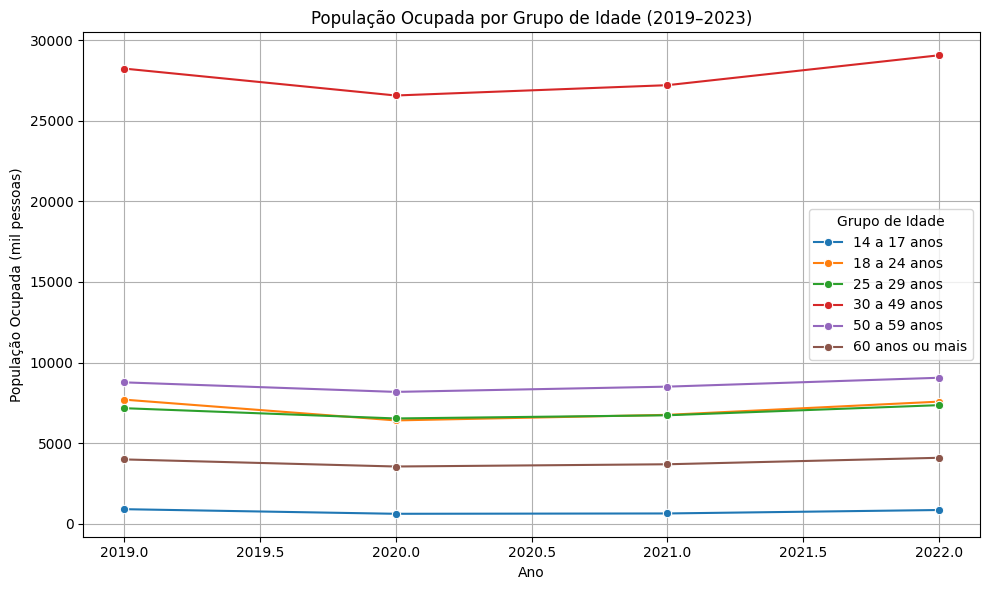

In [504]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='População ocupada (1 000 pessoas)',
    hue='Características selecionadas',
    marker='o',
    ci=None
)

plt.title('População Ocupada por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('População Ocupada (mil pessoas)')
plt.grid(True)
plt.legend(title='Grupo de Idade')
plt.tight_layout()
plt.show()

<ipython-input-505-f2223b15432f>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




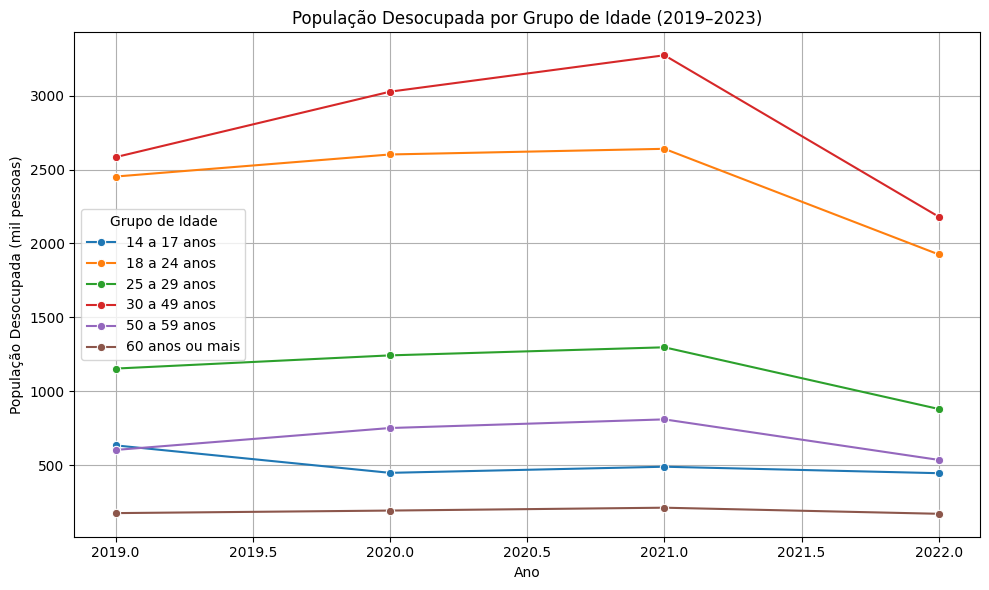

In [505]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='População desocupada (1 000 pessoas)',
    hue='Características selecionadas',
    marker='o',
    ci=None
)

plt.title('População Desocupada por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('População Desocupada (mil pessoas)')
plt.grid(True)
plt.legend(title='Grupo de Idade')
plt.tight_layout()
plt.show()

<ipython-input-506-88e7957b9a13>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




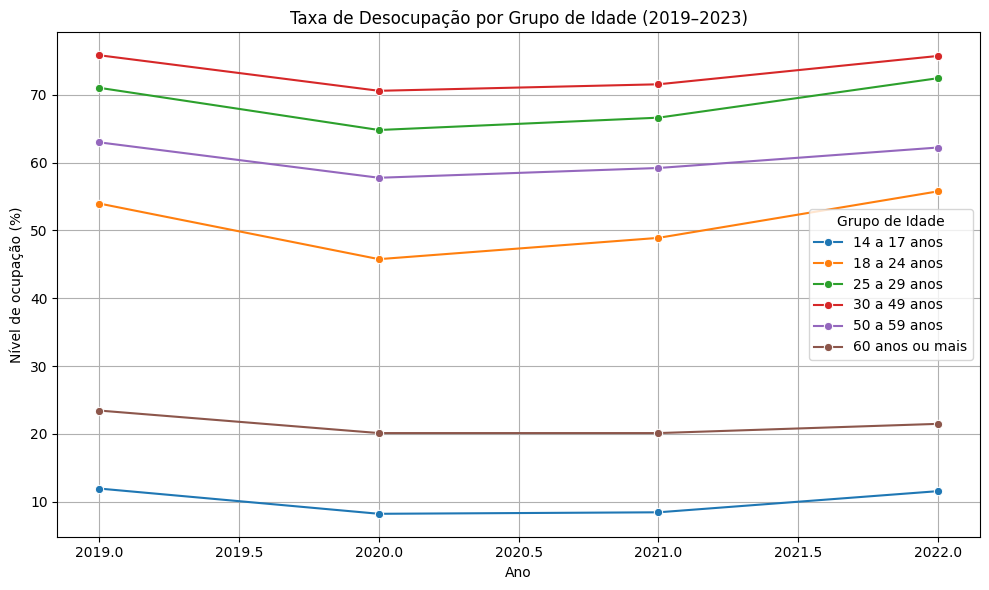

In [506]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='Nível de ocupação (%)',
    hue='Características selecionadas',
    marker='o',
    ci=None
)

plt.title('Taxa de Desocupação por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('Nível de ocupação (%)')
plt.grid(True)
plt.legend(title='Grupo de Idade')
plt.tight_layout()
plt.show()

<ipython-input-507-6e3cc5f47bd9>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




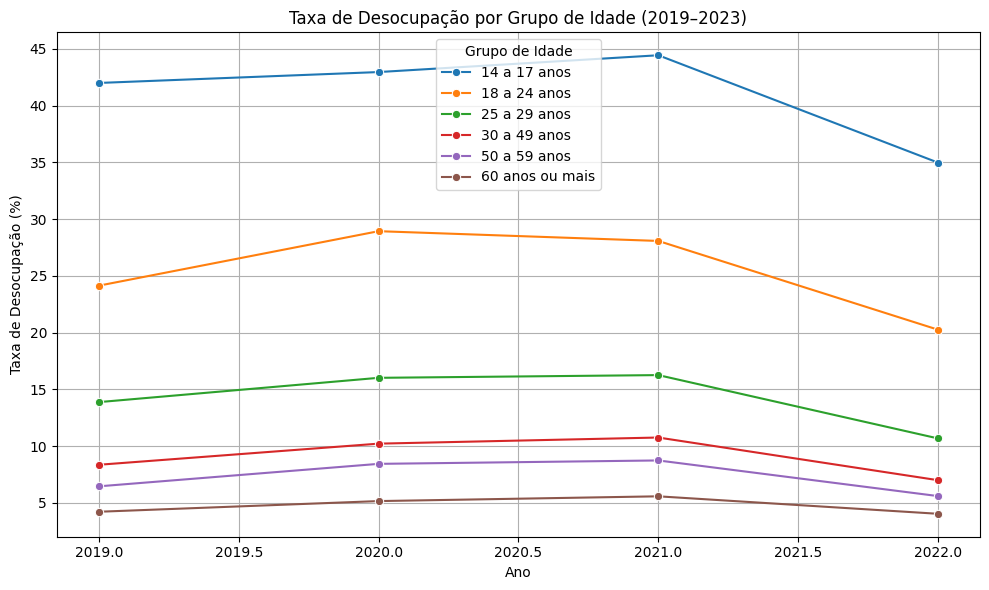

In [507]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='Taxa de desocupação (%)',
    hue='Características selecionadas',
    marker='o',
    ci=None
)

plt.title('Taxa de Desocupação por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Desocupação (%)')
plt.grid(True)
plt.legend(title='Grupo de Idade')
plt.tight_layout()
plt.show()

### Indices por Região (analisar mais afetadas)

In [508]:
display(df_geo)

,"Grandes Regiões, Unidades da Federação e Municípios",População em idade de trabalhar\n(1 000 pessoas),População na força de trabalho\n(1 000 pessoas),População ocupada\n(1 000 pessoas),População ocupada em trabalhos formais (1)\n(1 000 pessoas),População desocupada\n(1 000 pessoas),População na força de trabalho potencial\n(1 000 pessoas),População subutilizada\n(1 000 pessoas),Taxa de participação (%),Nível de ocupação (%),Taxa de formalização (%),Taxa de desocupação (%),Taxa composta de subutilização (%)
0,Brasil,174 809,109 156,100 690,59 675,8 466,7 023,20 889,"62,4","57,6","59,3","7,8","18,0"
1,Norte,14 652,8 854,8 169,3 449,685,782,1 966,"60,4","55,8","42,2","7,7","20,4"
2,Rondônia,1 496,851,824,486,27,19,56,"56,9","55,1","59,0","3,2","6,5"
3,Porto Velho,476,259,248,139,11,3,15,"54,4","52,0","56,1","4,4","5,9"
4,Acre,691,342,316,152,25,36,68,"49,4","45,7","48,0","7,5","18,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Brasília,2 606,1 793,1 611,1 096,182,64,300,"68,8","61,8","68,1","10,1","16,2"
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Fonte: IBGE. Pesquisa Nacional por Amostra de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Notas: Não são apresentados resultados para am...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
indices_para_excluir = list(range(60, 64))  # 70 não incluso, vai até 69

df_geo = df_geo.drop(indices_para_excluir).reset_index(drop=True)

In [510]:
display(df_geo)

,"Grandes Regiões, Unidades da Federação e Municípios",População em idade de trabalhar\n(1 000 pessoas),População na força de trabalho\n(1 000 pessoas),População ocupada\n(1 000 pessoas),População ocupada em trabalhos formais (1)\n(1 000 pessoas),População desocupada\n(1 000 pessoas),População na força de trabalho potencial\n(1 000 pessoas),População subutilizada\n(1 000 pessoas),Taxa de participação (%),Nível de ocupação (%),Taxa de formalização (%),Taxa de desocupação (%),Taxa composta de subutilização (%)
0,Brasil,174 809,109 156,100 690,59 675,8 466,7 023,20 889,"62,4","57,6","59,3","7,8","18,0"
1,Norte,14 652,8 854,8 169,3 449,685,782,1 966,"60,4","55,8","42,2","7,7","20,4"
2,Rondônia,1 496,851,824,486,27,19,56,"56,9","55,1","59,0","3,2","6,5"
3,Porto Velho,476,259,248,139,11,3,15,"54,4","52,0","56,1","4,4","5,9"
4,Acre,691,342,316,152,25,36,68,"49,4","45,7","48,0","7,5","18,0"
5,Rio Branco,333,183,166,95,17,10,29,"55,2","50,0","57,0","9,3","15,0"
6,Amazonas,3 182,1 946,1 752,703,194,139,424,"61,2","55,1","40,1","9,9","20,3"
7,Manaus,1 826,1 161,1 025,558,135,45,220,"63,6","56,2","54,4","11,7","18,3"
8,Roraima,449,280,262,120,18,13,38,"62,5","58,4","45,7","6,6","12,8"
9,Boa Vista,326,216,201,101,16,10,31,"66,2","61,4","50,4","7,2","13,8"


In [511]:
# concatenar tudo em um DataFrame único
df_geo = pd.concat(lista_geo, ignore_index=True)

# Converter colunas numéricas (exceto a primeira e 'Ano')
colunas_num = df_geo.columns[1:-1].tolist()

for col in colunas_num:
    df_geo[col] = pd.to_numeric(df_geo[col].astype(str).str.replace(' ', '').str.replace(',', '.'), errors='coerce')

In [512]:
# Limpar nomes de colunas: remover \n e espaços extras
df_geo.columns = [col.replace('\n', ' ').strip() for col in df_geo.columns]

# Verificar resultado
for i, col in enumerate(df_geo.columns):
    print(f"{i}: {col}")

0: Grandes Regiões, Unidades da Federação e Municípios
1: População em idade de trabalhar (1 000 pessoas)
2: População na força de trabalho (1 000 pessoas)
3: População ocupada (1 000 pessoas)
4: População ocupada em trabalhos formais (1) (1 000 pessoas)
5: População desocupada (1 000 pessoas)
6: População na força de trabalho potencial (1 000 pessoas)
7: População subutilizada (1 000 pessoas)
8: Taxa de participação (%)
9: Nível de ocupação (%)
10: Taxa de formalização (%)
11: Taxa de desocupação (%)
12: Taxa composta de subutilização (%)
13: Ano


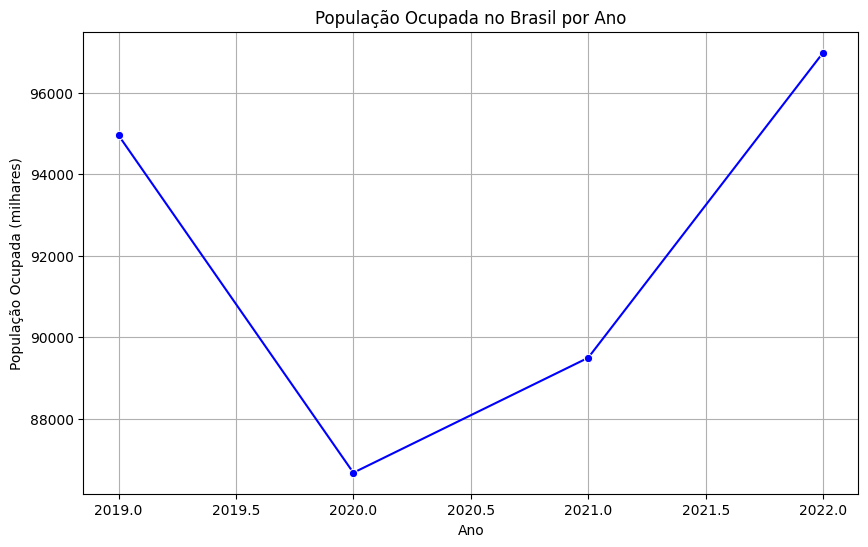

In [513]:
# Filtra apenas a linha do Brasil
df_brasil = df_geo[df_geo['Grandes Regiões, Unidades da Federação e Municípios'] == 'Brasil']

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='População ocupada (1 000 pessoas)',
    marker='o',
    color='blue'
)
plt.title('População Ocupada no Brasil por Ano')
plt.ylabel('População Ocupada (milhares)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

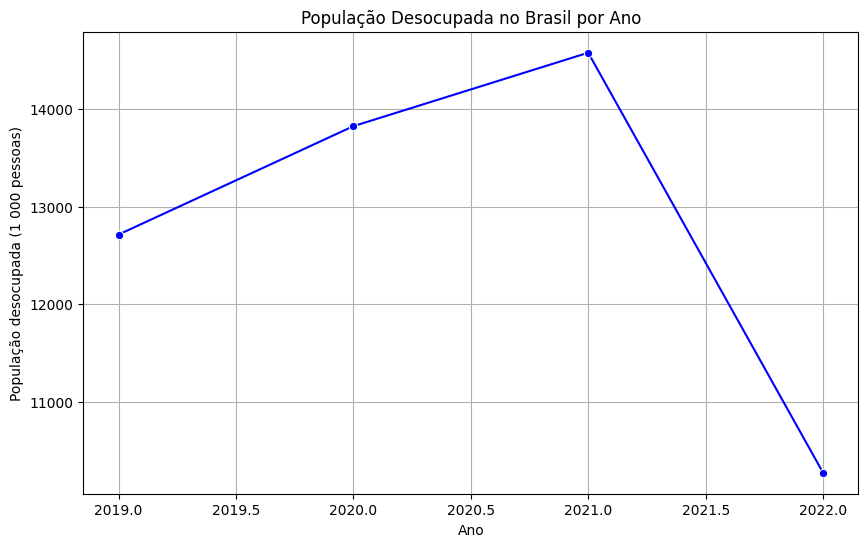

In [514]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='População desocupada (1 000 pessoas)',
    marker='o',
    color='blue'
)
plt.title('População Desocupada no Brasil por Ano')
plt.ylabel('População desocupada (1 000 pessoas)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

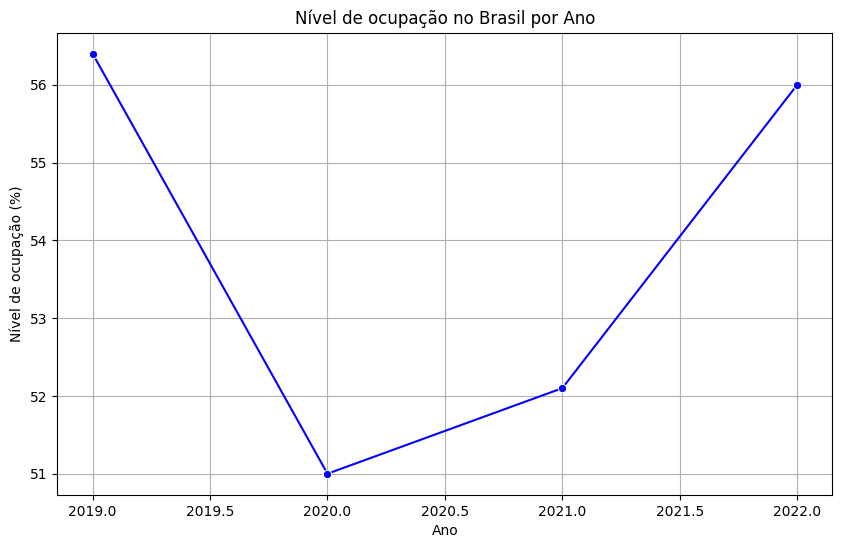

In [515]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='Nível de ocupação (%)',
    marker='o',
    color='blue'
)
plt.title('Nível de ocupação no Brasil por Ano')
plt.ylabel('Nível de ocupação (%)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

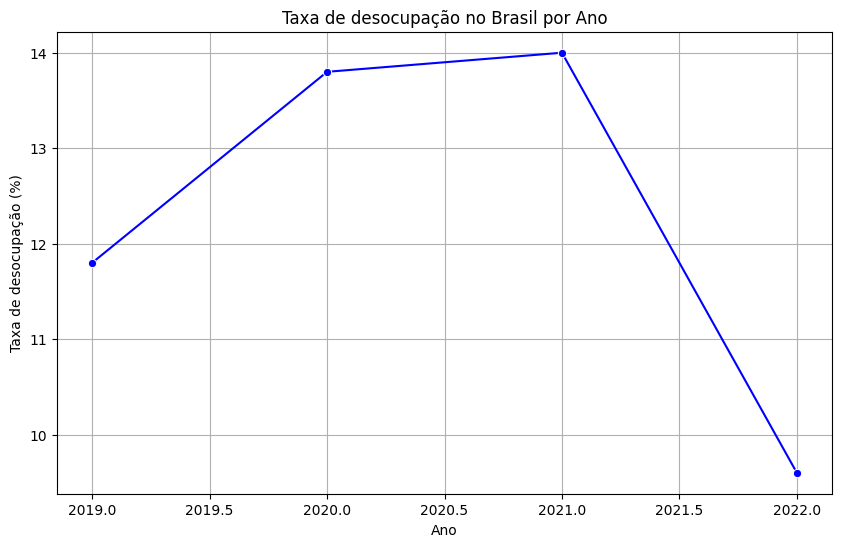

In [516]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='Taxa de desocupação (%)',
    marker='o',
    color='blue'
)
plt.title('Taxa de desocupação no Brasil por Ano')
plt.ylabel('Taxa de desocupação (%)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

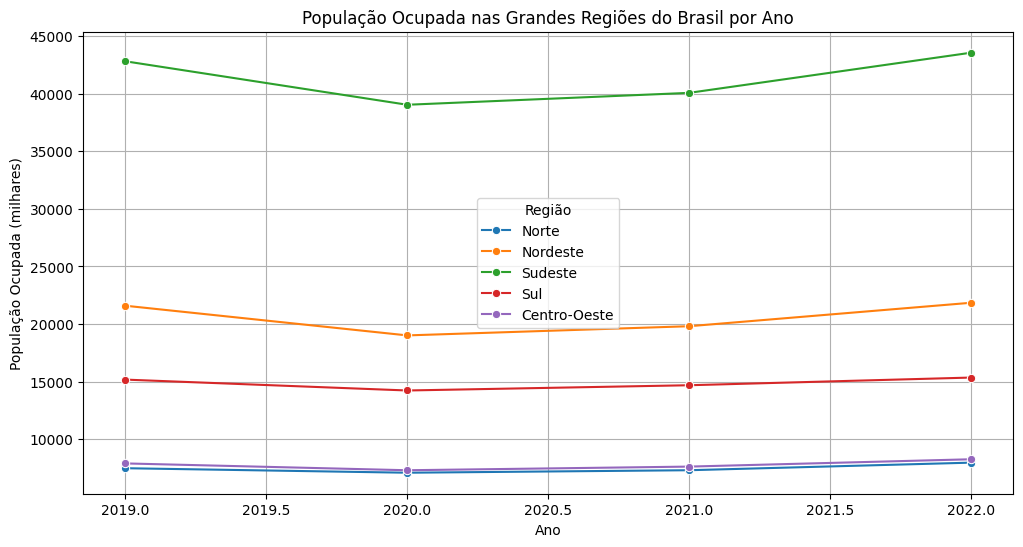

In [517]:
grandes_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
df_regioes = df_geo[df_geo['Grandes Regiões, Unidades da Federação e Municípios'].isin(grandes_regioes)]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='População ocupada (1 000 pessoas)',
    hue='Grandes Regiões, Unidades da Federação e Municípios',
    marker='o'
)
plt.title('População Ocupada nas Grandes Regiões do Brasil por Ano')
plt.ylabel('População Ocupada (milhares)')
plt.xlabel('Ano')
plt.legend(title='Região')
plt.grid(True)
plt.show()

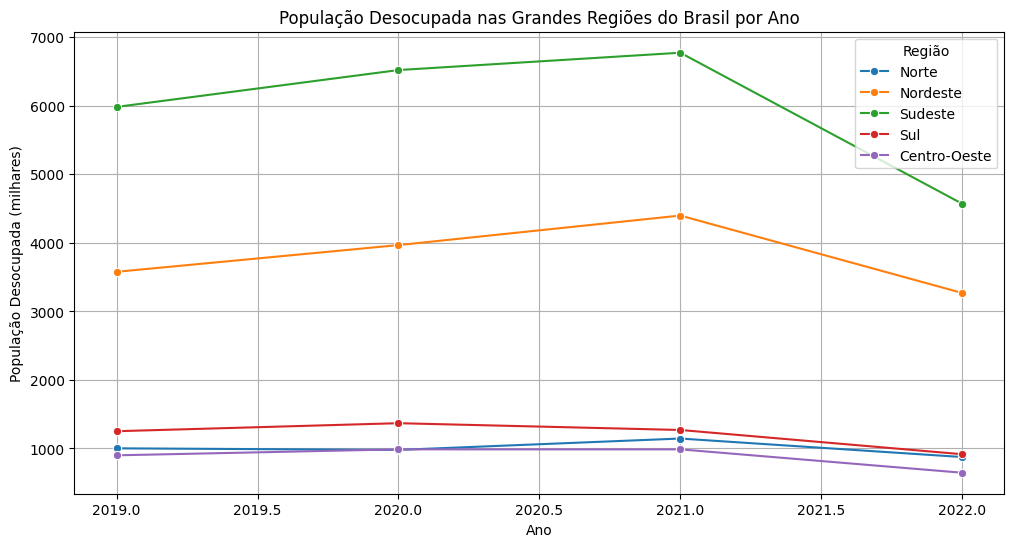

In [518]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='População desocupada (1 000 pessoas)',
    hue='Grandes Regiões, Unidades da Federação e Municípios',
    marker='o'
)
plt.title('População Desocupada nas Grandes Regiões do Brasil por Ano')
plt.ylabel('População Desocupada (milhares)')
plt.xlabel('Ano')
plt.legend(title='Região')
plt.grid(True)
plt.show()

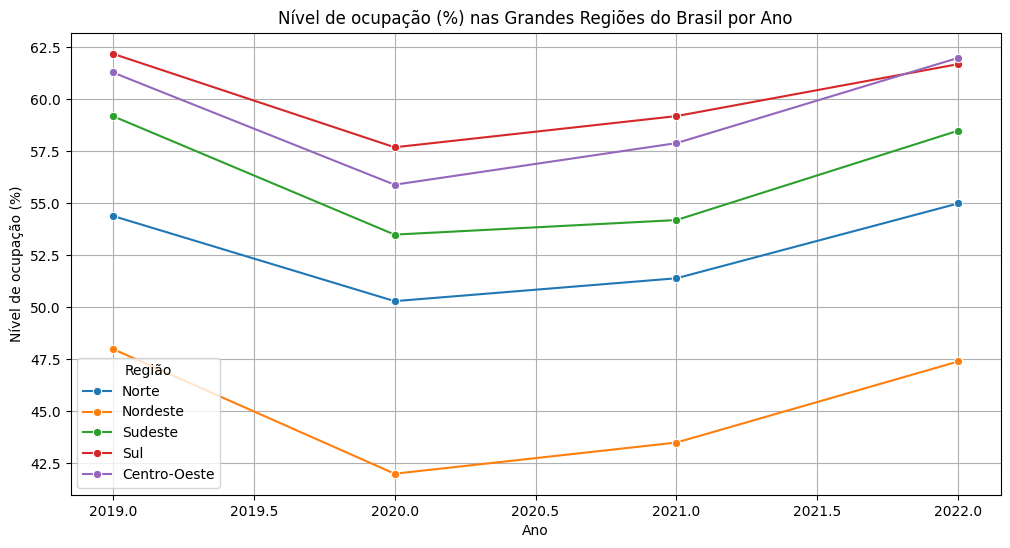

In [519]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='Nível de ocupação (%)',
    hue='Grandes Regiões, Unidades da Federação e Municípios',
    marker='o'
)
plt.title('Nível de ocupação (%) nas Grandes Regiões do Brasil por Ano')
plt.ylabel('Nível de ocupação (%)')
plt.xlabel('Ano')
plt.legend(title='Região')
plt.grid(True)
plt.show()

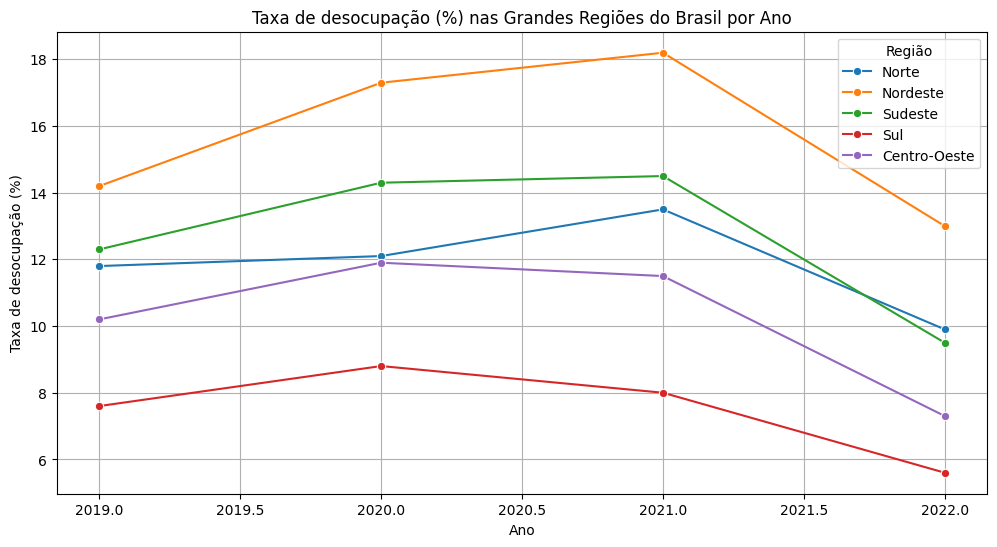

In [520]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='Taxa de desocupação (%)',
    hue='Grandes Regiões, Unidades da Federação e Municípios',
    marker='o'
)
plt.title('Taxa de desocupação (%) nas Grandes Regiões do Brasil por Ano')
plt.ylabel('Taxa de desocupação (%)')
plt.xlabel('Ano')
plt.legend(title='Região')
plt.grid(True)
plt.show()

## Rendimento Escolar

In [521]:
display(df_esc)

,Ano,Unidade Geográfica,Localização,Dependência Administrativa,Total Taxa de Aprovação Ensino Fundamental,Anos Iniciais,Anos Finais,1º Ano,2º Ano,3º Ano,...,6º Ano.2,7º Ano.2,8º Ano.2,9º Ano.2,Total Taxa de Abandono Ensino Médio,1ª série.2,2ª série.2,3ª série.2,4ª série.2,Não-Seriado.2
0,2023,Brasil,Total,Total,"95,8","97,2",94,99,"98,4","95,8",...,"0,9","1,1","1,4","1,4","3,4","3,6","3,4","2,7","2,5","6,2"
1,2023,Brasil,Urbana,Total,"96,2","97,6","94,5","99,1","98,4","96,2",...,"0,7","0,9","1,1","1,2","3,3","3,6","3,4","2,7","2,4","6,2"
2,2023,Brasil,Rural,Total,"93,1",95,"90,3","98,9","98,1","92,8",...,"2,1","2,6","3,2","2,8","3,6","3,9","3,4","3,2","4,3",7
3,2023,Brasil,Total,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,4","1,4",1,"1,2",2,"3,2"
4,2023,Brasil,Urbana,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,5","1,4","1,1","1,2","2,1","3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2023,Distrito Federal,Urbana,Privada,"99,1","99,7","98,2","99,9","99,9","99,6",...,0,0,0,0,"0,5",0,"0,1","0,2",--,"12,7"
583,2023,Distrito Federal,Rural,Privada,100,100,100,100,100,100,...,--,0,0,0,0,0,0,0,--,--
584,2023,Distrito Federal,Total,Pública,"93,9","95,1","92,5","98,2","98,9","87,5",...,1,"1,4","1,2","1,8","3,8",4,"4,5",3,--,--
585,2023,Distrito Federal,Urbana,Pública,"93,9","95,1","92,5","98,2","98,8","87,6",...,"1,1","1,5","1,2","1,8","3,9","4,1","4,6","2,9",--,--


In [522]:
df_2023.columns = df_2023.columns.str.strip()  # tira espaços no começo/fim
df_2023.columns = df_2023.columns.str.replace('\.', '', regex=True)  # tira pontos
df_2023.columns = df_2023.columns.str.replace('\s+', ' ', regex=True)  # substitui múltiplos espaços por um espaço